In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller, acf, pacf

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX 

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# TASK 1
df = pd.read_csv('DS3_C1_S5_SuperstoreSales_Data_Hackathon.csv', parse_dates=['Order Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df.shape)
df.head()

(2121, 16)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [3]:

df1 = df.set_index('Order Date')
df1.head()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [4]:
dfr = df1.resample('M').sum()
print(len(dfr))
print(dfr)

48
            Row ID  Postal Code       Sales  Quantity  Discount     Profit
Order Date                                                                
2014-01-31   88666      1060353   6242.5250        70      2.70   805.4665
2014-02-28   44473       464076   1839.6580        23      0.80   120.6917
2014-03-31  192586      1914913  14573.9560       131      7.60 -1128.6550
2014-04-30  125557      1702707   7944.8370        81      3.45   554.3801
2014-05-31  115362      1380475   6912.7870        97      6.15  -349.8776
2014-06-30  105986      1639759  13206.1256       122      4.72   596.3153
2014-07-31  161203      2118995  10821.0510       114      6.15   374.2467
2014-08-31  110995      1371428   7320.3465       107      3.15   663.4717
2014-09-30  298230      2816738  23816.4808       208      8.67  1858.5976
2014-10-31  144500      1712655  12304.2470       130      5.35   249.1645
2014-11-30  326837      3540213  21564.8727       228     12.07  -297.8958
2014-12-31  329599    

In [5]:
dfs = dfr['Sales']
dfs

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

In [6]:
ss = int(0.7 * len(dfs))

train = dfs.iloc[:ss]
test = dfs.iloc[ss:]

print('Train : ',len(train), '\t Test : ',len(test))

Train :  33 	 Test :  15


In [7]:
train

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
Freq: M, Name: Sales, dtype: float64

In [8]:
test

Order Date
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30     9065.9581
2017-05-31    16957.5582
2017-06-30    19008.5867
2017-07-31    11813.0220
2017-08-31    15441.8740
2017-09-30    29028.2060
2017-10-31    21884.0682
2017-11-30    37056.7150
2017-12-31    31407.4668
Freq: M, Name: Sales, dtype: float64

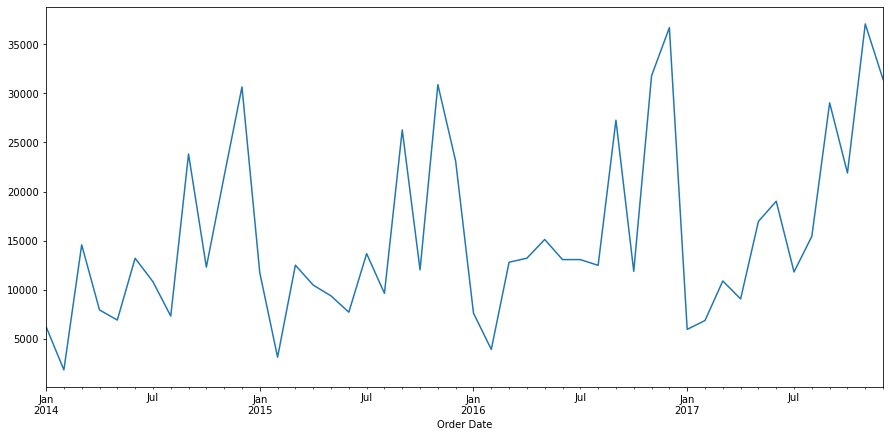

In [9]:
plt.figure(figsize=(15,7))
dfs.plot()
plt.show()

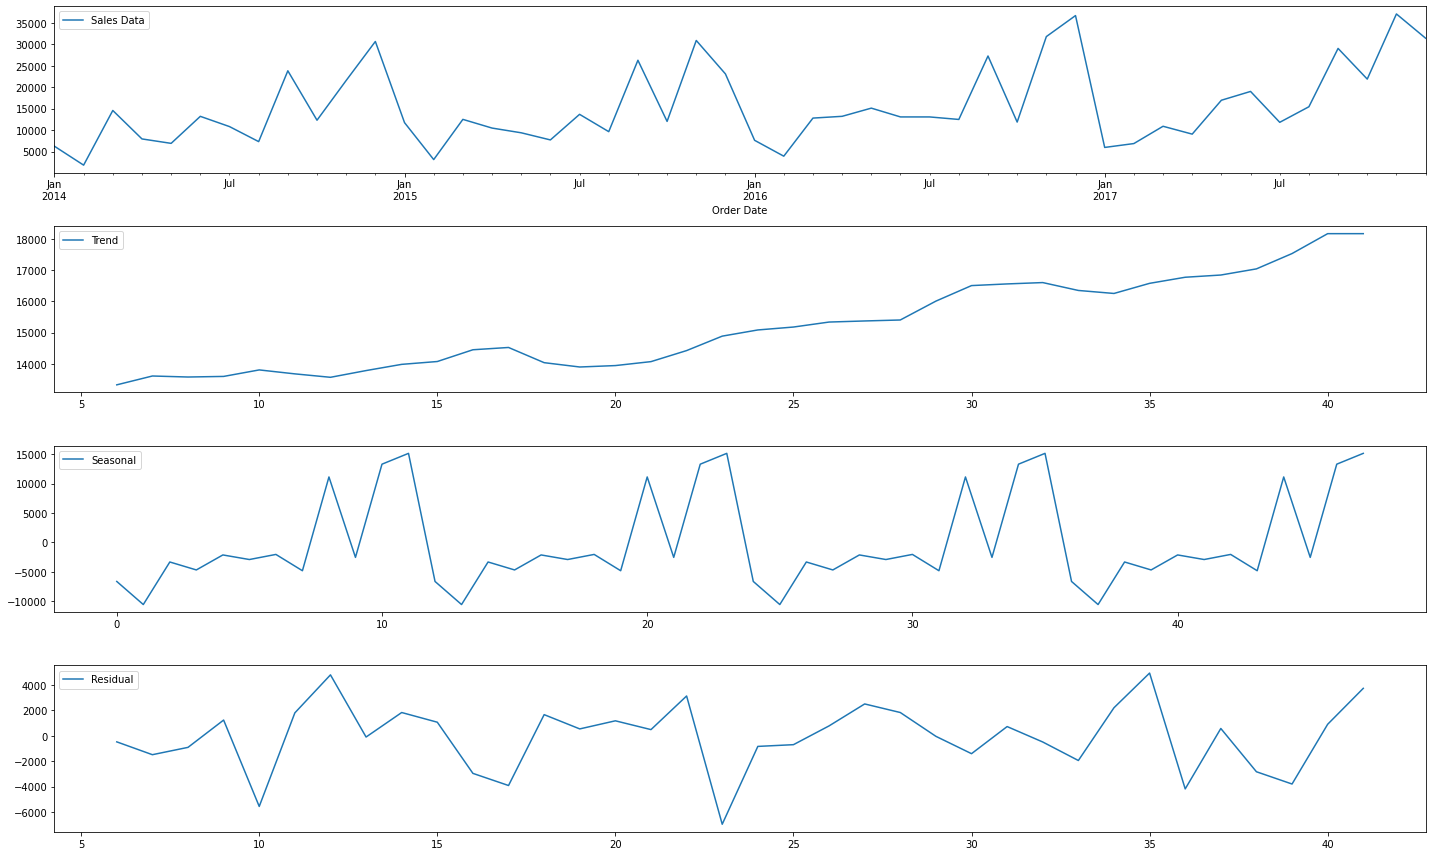

In [10]:
decomposition = seasonal_decompose(np.asarray(dfs), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
dfs.plot(label='Sales Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [11]:
# TASK 2
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        msg = "pvalue={} Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={} Data is not Stationary. Make the data stationary before model building".format(pvalue)
    return msg

In [12]:
print(checkStationarity(train))

pvalue=0.0019663651093446387 Data is Stationary. Proceed to model building


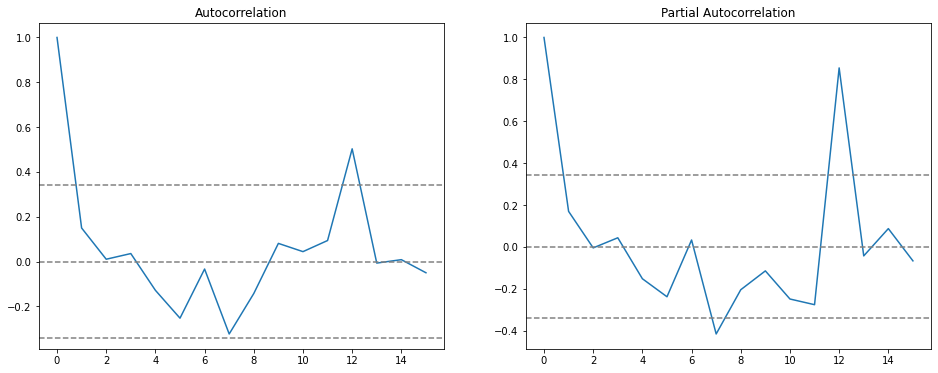

In [13]:
lag_pcf = acf(train, nlags=15)
lag_pacf = pacf(train, nlags=15, method='ols')

# For ACF

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.title('Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0 , linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.show()

In [14]:
p=[1,2,3]; q=[1,2,3]
AIC=[]
for x in p:
    for y in q: 
        m1 = ARIMA(train, order=(x,0,y)).fit()
        print('for: p=',x,'and q=',y)
        print(m1.aic)
        AIC.append(m1.aic)
print(min(AIC))

for: p= 1 and q= 1
689.4463444301823
for: p= 1 and q= 2
691.4613455229672
for: p= 1 and q= 3
691.4795398787876
for: p= 2 and q= 1
691.4323090429087
for: p= 2 and q= 2
693.4368701532638
for: p= 2 and q= 3
690.1928466028303
for: p= 3 and q= 1
693.3492399435348
for: p= 3 and q= 2
690.9078082309852
for: p= 3 and q= 3
691.6135375984132
689.4463444301823


Here, p=1 and q=1 for ARMA model as it is giving minimum aic.

In [15]:
# TASK 3
p=2; q=3

m = ARIMA(train, order=(p,0,q)).fit()
print(m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -338.096
Date:                Mon, 02 May 2022   AIC                            690.193
Time:                        00:01:53   BIC                            700.668
Sample:                    01-31-2014   HQIC                           693.718
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.352e+04   2270.007      5.957      0.000    9074.432     1.8e+04
ar.L1         -1.0089      0.129     -7.836      0.000      -1.261      -0.757
ar.L2         -0.9924      0.053    -18.619      0.0

In [16]:
strt = len(train)
end = len(train) + len(test) - 1

print('Start : ',strt,'End : ',end)

prediction = m.predict(strt, end)
prediction

Start :  33 End :  47


2016-10-31    13344.363954
2016-11-30    12501.303731
2016-12-31    17461.973320
2017-01-31    10564.778533
2017-02-28    12599.991604
2017-03-31    17391.690196
2017-04-30    10537.744110
2017-05-31    12697.016216
2017-06-30    17320.635595
2017-07-31    10513.138659
2017-08-31    12792.355968
2017-09-30    17248.870210
2017-10-31    10490.922384
2017-11-30    12885.990775
2017-12-31    17176.453799
Freq: M, Name: predicted_mean, dtype: float64

In [17]:
pvalue = sm.stats.acorr_ljungbox(m.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [18]:
actual=[]; pred=[]

for i in range(len(prediction)):
    actual.append(test[i])
    pred.append(prediction.iloc[i])

dfs1 = pd.DataFrame({'Actual':actual, 'Predicted':pred})
dfs1['Error'] = dfs1['Actual'] - dfs1['Predicted']
dfs1

,Actual,Predicted,Error
0,11872.5770,13344.363954,-1471.786954
1,31783.6288,12501.303731,19282.325069
2,36678.7150,17461.973320,19216.741680
3,5964.0320,10564.778533,-4600.746533
4,6866.3374,12599.991604,-5733.654204
5,10893.4448,17391.690196,-6498.245396
6,9065.9581,10537.744110,-1471.786010
7,16957.5582,12697.016216,4260.541984
8,19008.5867,17320.635595,1687.951105
9,11813.0220,10513.138659,1299.883341


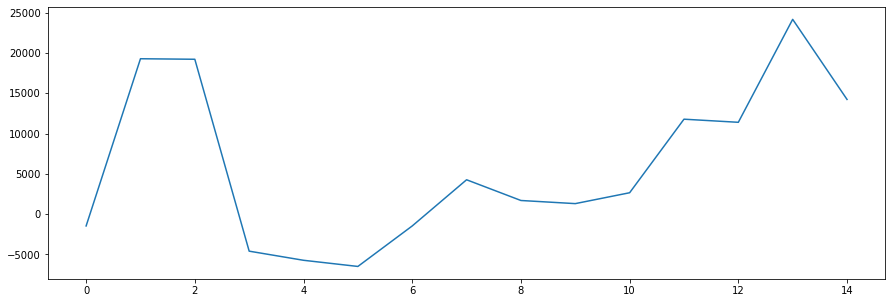

In [19]:
plt.subplots(figsize=(15,5))
plt.plot(dfs1.Error)
plt.show()

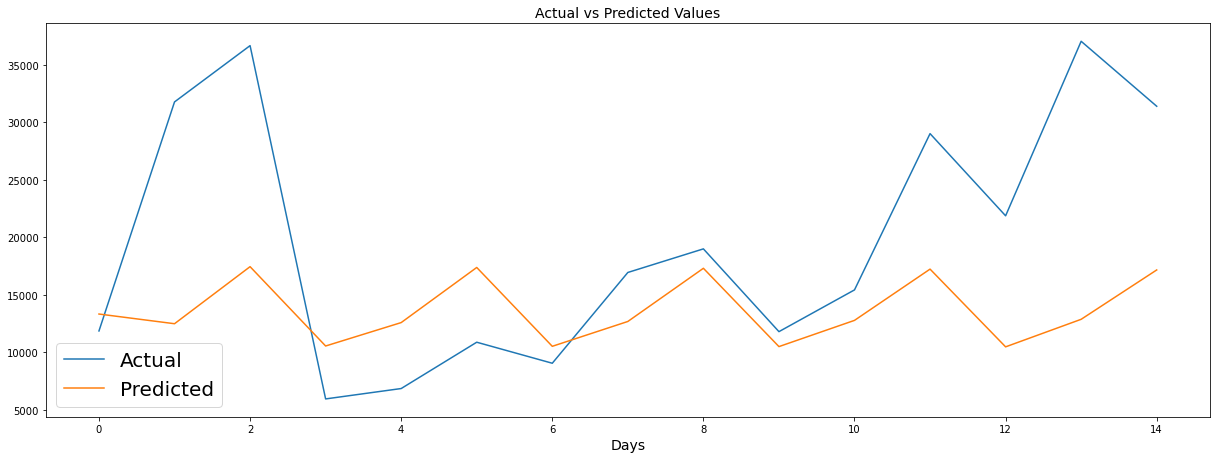

In [20]:
plt.subplots(figsize=(17,6))
plt.plot(dfs1.Actual, label='Actual')  
plt.plot(dfs1.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [21]:
# TASK 4
p=2; q=3

m = ARIMA(train, order=(p,0,q)).fit()
print(m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -338.096
Date:                Mon, 02 May 2022   AIC                            690.193
Time:                        00:01:54   BIC                            700.668
Sample:                    01-31-2014   HQIC                           693.718
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.352e+04   2270.007      5.957      0.000    9074.432     1.8e+04
ar.L1         -1.0089      0.129     -7.836      0.000      -1.261      -0.757
ar.L2         -0.9924      0.053    -18.619      0.0

In [22]:
fcast = m.predict(start=len(dfs), end=len(dfs)+11, typ='levels')
print(fcast)

2018-01-31    10471.054932
2018-02-28    12977.902044
2018-03-31    17103.445168
2018-04-30    10453.495428
2018-05-31    13068.072651
2018-06-30    17029.902157
2018-07-31    10438.202513
2018-08-31    13156.486919
2018-09-30    16955.881627
2018-10-31    10425.134381
2018-11-30    13243.130594
2018-12-31    16881.439449
Freq: M, Name: predicted_mean, dtype: float64


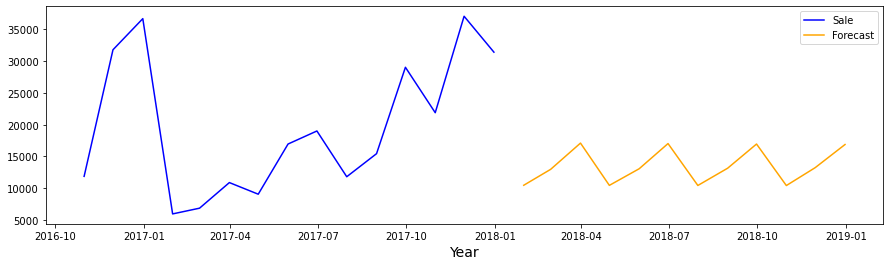

In [23]:
# Forcasting the future values 

plt.subplots(figsize=(15,4))
plt.plot(test, color='blue', label='Sale')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.show()

In [24]:
# TASK 5
p=2; q=3; d=2

m1 = sm.tsa.statespace.SARIMAX(dfs, order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 2, 3)x(2, 2, 3, 12)   Log Likelihood                -225.705
Date:                            Mon, 02 May 2022   AIC                            473.409
Time:                                    00:02:02   BIC                            485.411
Sample:                                01-31-2014   HQIC                           476.236
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6278      1.879     -0.334      0.738      -4.311       3.056
ar.L2          0.3649      1.600      0.228      0.820      -2.770       3.500
ma.L1         -0.8458      1.714     -0.493      0.622      -4.205       2.514
ma.L2         -0.7409      2.330     -0.318      0.751      -5.308       3.827
ma.L3          0.7121      1.096      0.650      0.516      -1.435       2.859
ar.S.L12      -0.2704   1024.559     -0.000      1.000   -2008.369    2007.829
ar.S.L24       0.2795    658.620      0.000      1.000   -1290.592    1291.151
ma.S.L12      -0.5967   1022.366     -0.001      1.000   -2004.397    2003.204
ma.S.L24      -0.1355    235.752     -0.001      1.000    -462.200     461.929
ma.S.L36       0.1230    192.574      0.001      0.999    -377.315     377.561
sigma2      8.355e+07      0.030    2.8e+09      0.000    8.36e+07    8.36e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.78   Prob(JB):                         0.62
Heteroskedasticity (H):               1.04   Skew:                            -0.35
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.68e+25. Standard errors may be unstable.
"""

In [25]:
strt = len(train)
end = len(train) + len(test) - 1

print('Start : ',strt,'End : ',end)

prediction1 = m1.predict(strt, end, typ='levels')                                    
prediction1

Start :  33 End :  47


Order Date
2016-10-31    13218.115728
2016-11-30    38078.531064
2016-12-31    32750.520926
2017-01-31     6271.243886
2017-02-28     4263.198962
2017-03-31    11531.797781
2017-04-30    17591.337783
2017-05-31    11345.225504
2017-06-30    13654.794518
2017-07-31    17148.340475
2017-08-31    16398.550606
2017-09-30    30760.637894
2017-10-31    15180.132964
2017-11-30    42167.871997
2017-12-31    44069.742476
Freq: M, Name: predicted_mean, dtype: float64

In [26]:
actual=[]; pred=[]

for i in range(len(prediction1)):
    actual.append(test[i])
    pred.append(prediction1[i])

dfs2 = pd.DataFrame({'Actual':actual, 'Predicted':pred})
dfs2['Error'] = dfs2['Actual'] - dfs2['Predicted']
dfs2

,Actual,Predicted,Error
0,11872.5770,13218.115728,-1345.538728
1,31783.6288,38078.531064,-6294.902264
2,36678.7150,32750.520926,3928.194074
3,5964.0320,6271.243886,-307.211886
4,6866.3374,4263.198962,2603.138438
5,10893.4448,11531.797781,-638.352981
6,9065.9581,17591.337783,-8525.379683
7,16957.5582,11345.225504,5612.332696
8,19008.5867,13654.794518,5353.792182
9,11813.0220,17148.340475,-5335.318475


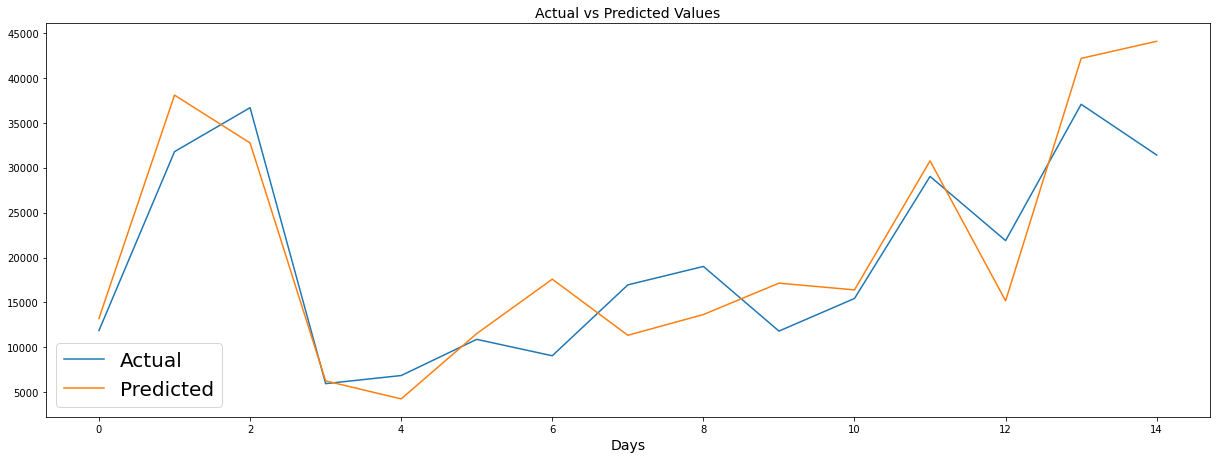

In [27]:
plt.subplots(figsize=(17,6))
plt.plot(dfs2.Actual, label='Actual')  
plt.plot(dfs2.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [28]:
fcast = m1.predict(start=len(dfs), end=len(dfs)+11, typ='levels')
print(fcast)

2018-01-31    -1282.992860
2018-02-28     6475.791765
2018-03-31     7376.985224
2018-04-30     9426.727805
2018-05-31    15160.391962
2018-06-30    20292.470997
2018-07-31     5838.743882
2018-08-31    14123.991628
2018-09-30    25045.439235
2018-10-31    19238.149530
2018-11-30    33196.593460
2018-12-31    34232.966188
Freq: M, Name: predicted_mean, dtype: float64


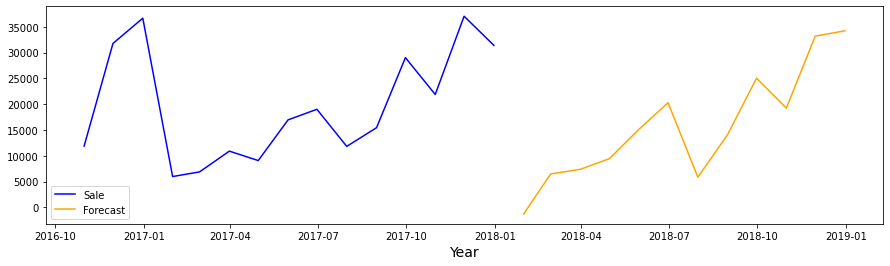

In [29]:
plt.subplots(figsize=(15,4))
plt.plot(test, color='blue', label='Sale')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.show()

In [30]:
# TASK 6
print('ARMA model - Order = (',2,',',3,')')

mse = mean_squared_error(test, prediction)

print("MSE : ",mse)
print('RMSE : ',np.sqrt(mse))
print('AIC :', m.aic)
print('BIC :', m.bic)

ARMA model - Order = ( 2 , 3 )
MSE :  128447039.16188496
RMSE :  11333.447805583479
AIC : 690.1928466028303
BIC : 700.6683995330957


In [31]:
print('SARIMAX model - Order = (',2,',',3,',',2,')')
mse = mean_squared_error(test, prediction1)

print("MSE : ",mse)
print('RMSE : ',np.sqrt(mse))
print('AIC :', m1.aic)
print('BIC :', m1.bic)

SARIMAX model - Order = ( 2 , 3 , 2 )
MSE :  30718048.084253445
RMSE :  5542.386497191751
AIC : 473.40928332105466
BIC : 485.4107503079961


Here SARIMAX is performing better in all aspects such as MSE, AIC and BIC. Also the prediction graph is much better in SARIMAX.